Simulates data from the model derived in Ref. 24

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def musc_fluct(v,t,m_b,c_br,m_a,c_ar,c_ab,m_m,c_m,alpha=0,amp=2):
    """
    Stochatic ODE model of intertidal community
    """    
    R=1-v[0]-v[2]-v[3]
    F=1+alpha*(3.4+np.random.normal(0,amp))
    Ad=F*m_a*(v[1]+(v[2]-v[1]))
    dvdt=[c_br*(v[0]+v[1])*R-c_ab*v[2]*v[0]-c_m*v[3]*v[0]-m_b*v[0]+F*m_a*v[1],
          c_ab*v[2]*v[0]-c_m*v[3]*v[1]-m_b*v[1]-F*m_a*v[1],
          c_ar*v[2]*R+c_ab*v[2]*v[0]-c_m*v[3]*v[2]-Ad,
          c_m*v[2]*(v[0]+v[2])-F*m_m*v[3]]
    return dvdt

def Eul(Sys,initial,t,const):
    """
    Euler integration function
    """
    dt=t[-1]/len(t)
    v=np.zeros((len(t),len(initial)))
    v[0,:]=list(initial)
    for i in range (1,len(t)):
        v[i,:]=v[i-1,:]+np.array(Sys(v[i-1,:],t[i],*const))*dt
        v[i,:]=v[i,:]*(v[i,:]>0)
    return v

#def const from paper
m_b=.003
c_br=.018
m_a=.013
c_ar=.021
c_ab=.049
m_m=.017
c_m=.078
alpha=.28
amp=2
names=['$bare barnacle$','algae-covered barnacle$','algae','mussel']

In [3]:
#Set up and run Fluctuating ode

#Temperature dependent noise, real Parameters
initial=[.1,.1,.1,.1]
endt=3*10**6
t=np.linspace(0,endt,int(endt))
const=(m_b,c_br,m_a,c_ar,c_ab,m_m,c_m,alpha,amp)
z=Eul(musc_fluct,initial,t,const)

st=-3*10**4
np.save('intertidal_simulated.npy',z[st:,:])

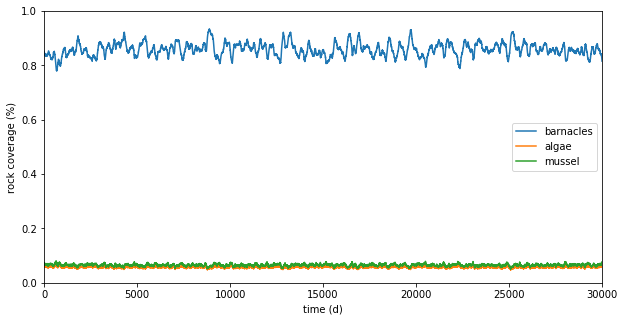

In [4]:
#Plot everything after initial transient
fig=plt.figure(figsize=(10,5))
plt.plot(t[st:]-t[st],z[st:,0]+z[st:,0],label='barnacles')
plt.plot(t[st:]-t[st],z[st:,2],label='algae')
plt.plot(t[st:]-t[st],z[st:,3], label='mussel')
plt.xlim(0,t[np.abs(st)])
plt.legend()
plt.ylabel('rock coverage (%)')
plt.xlabel('time (d)')
plt.ylim(0,1)
plt.show()